<a href="https://colab.research.google.com/github/Minach2002/deep-learning-projects/blob/main/speech_emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import os
import pandas as pd
import torch
import torchaudio
from transformers import Wav2Vec2Processor
import librosa
import seaborn as sns

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
audio_dataset='/content/drive/My Drive/tess-1/TESS'


In [13]:
paths = []
labels = []

for subfolders in os.listdir(audio_dataset):
  os.path.join(audio_dataset, subfolders)
  subfolder_path =os.path.join(audio_dataset, subfolders)

  if(os.path.isdir(subfolder_path)):
    for file_name in os.listdir(subfolder_path):
      if(file_name.endswith('.wav')):
        file_path = os.path.join(subfolder_path, file_name)
        paths.append(file_path)
        labels.append(subfolders)

print(f"Total lenght:{len(paths)}")
print(f"Sample paths: {paths[:5]}")
print(f"Sample labels: {labels[:5]}")

Total lenght:2800
Sample paths: ['/content/drive/My Drive/tess-1/TESS/fear/YAF_time_fear.wav', '/content/drive/My Drive/tess-1/TESS/fear/YAF_wash_fear.wav', '/content/drive/My Drive/tess-1/TESS/fear/YAF_vine_fear.wav', '/content/drive/My Drive/tess-1/TESS/fear/YAF_take_fear.wav', '/content/drive/My Drive/tess-1/TESS/fear/YAF_sub_fear.wav']
Sample labels: ['fear', 'fear', 'fear', 'fear', 'fear']


In [14]:
df = pd.DataFrame()
df['speech'] = paths
df['labels'] = labels
df.head()


,speech,labels
0,/content/drive/My Drive/tess-1/TESS/fear/YAF_t...,fear
1,/content/drive/My Drive/tess-1/TESS/fear/YAF_w...,fear
2,/content/drive/My Drive/tess-1/TESS/fear/YAF_v...,fear
3,/content/drive/My Drive/tess-1/TESS/fear/YAF_t...,fear
4,/content/drive/My Drive/tess-1/TESS/fear/YAF_s...,fear


In [15]:
df.tail()

,speech,labels
2795,/content/drive/My Drive/tess-1/TESS/pleasant_s...,pleasant_surprised
2796,/content/drive/My Drive/tess-1/TESS/pleasant_s...,pleasant_surprised
2797,/content/drive/My Drive/tess-1/TESS/pleasant_s...,pleasant_surprised
2798,/content/drive/My Drive/tess-1/TESS/pleasant_s...,pleasant_surprised
2799,/content/drive/My Drive/tess-1/TESS/pleasant_s...,pleasant_surprised


In [16]:
df.value_counts('labels')

,count
labels,
angry,400
disgust,400
fear,400
happy,400
neutral,400
pleasant_surprised,400
sad,400


<Axes: xlabel='count', ylabel='labels'>

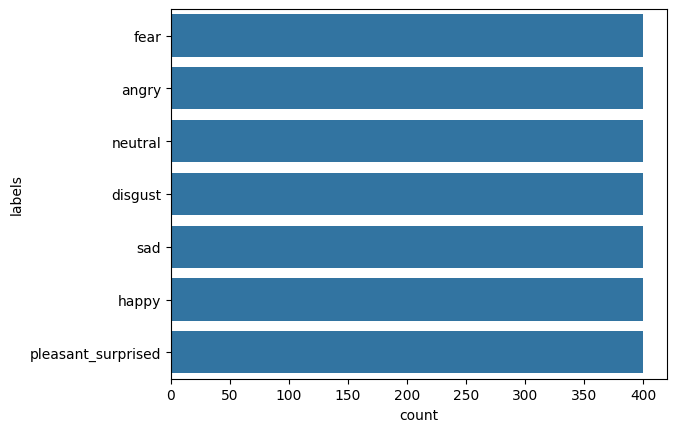

In [19]:
sns.countplot(df['labels'])